# House price regression

The main goal of this project is to estimate the sale price of real estate

## Problem
We got hired by a real estate investor in order to propose him a software solution to estimate quickly the value of housholds. The goal of this application is to scan the whole real estate market in order to indentify undervaluate household.

## Solution
To answer this problem, we propose a regression algorithm that will estimate the value of household given some specific properties. Then by comparing the estimate value against the market value, we'll be able to spot investment opportunities

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from math import sqrt
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

### Data import, cleaning and analysis
The first step would be to import the data in order to prepare it for the algorithm.
To do so, we'll start by importing the data and list every feature

In [2]:
data = pd.read_csv('train.csv')
for name,dtype in zip(data.columns, data.dtypes):
    print(name,": ", dtype, "         Ex: ", data[name].iloc[0], "    Number of NaN: ", data[name].isnull().sum())

Id :  int64          Ex:  1     Number of NaN:  0
MSSubClass :  int64          Ex:  60     Number of NaN:  0
MSZoning :  object          Ex:  RL     Number of NaN:  0
LotFrontage :  float64          Ex:  65.0     Number of NaN:  259
LotArea :  int64          Ex:  8450     Number of NaN:  0
Street :  object          Ex:  Pave     Number of NaN:  0
Alley :  object          Ex:  nan     Number of NaN:  1369
LotShape :  object          Ex:  Reg     Number of NaN:  0
LandContour :  object          Ex:  Lvl     Number of NaN:  0
Utilities :  object          Ex:  AllPub     Number of NaN:  0
LotConfig :  object          Ex:  Inside     Number of NaN:  0
LandSlope :  object          Ex:  Gtl     Number of NaN:  0
Neighborhood :  object          Ex:  CollgCr     Number of NaN:  0
Condition1 :  object          Ex:  Norm     Number of NaN:  0
Condition2 :  object          Ex:  Norm     Number of NaN:  0
BldgType :  object          Ex:  1Fam     Number of NaN:  0
HouseStyle :  object          Ex: 

Given this analysis, we can notice that some features doesn't contain any valuable information
Those features are:
- Id
- ...

In addition of that, we notice that there is many missing values. The job here would be to differanciate missing values (errors in the dataset) from the absence of the concernate feature in the house.

In the first case, we'll remove the row.

In the second case, we'll considere any object that can be absent as added value, and thus replacing NaNs by zero.

In [3]:
data.describe(include=['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [4]:
for column in data:
    print(data[column].value_counts())

1460    1
479     1
481     1
482     1
483     1
       ..
976     1
977     1
978     1
979     1
1       1
Name: Id, Length: 1460, dtype: int64
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64
7200     25
9600     24
6000     17
10800    14
9000     14
         ..
7094      1
6130      1
9337      1
5232      1
8190      1
Name: LotArea, Length: 1073, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
Grvl    50
Pave    41
Name: Alley, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311


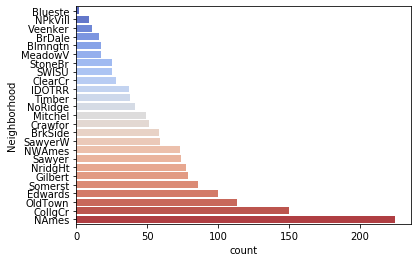

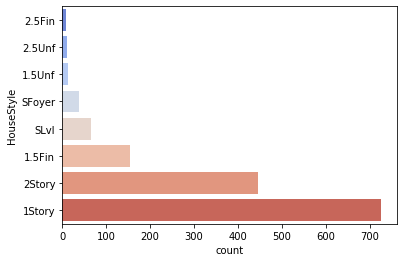

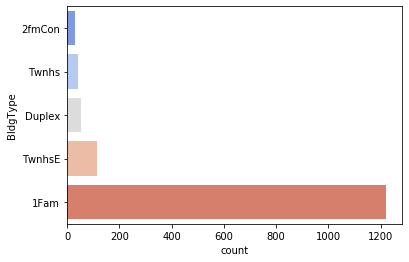

In [5]:
ax = sns.countplot(y="Neighborhood", data=data, order=data["Neighborhood"].value_counts().sort_values().index, palette ='coolwarm') #comment changer la taille
plt.show()
ax = sns.countplot(y="HouseStyle", data=data, order=data["HouseStyle"].value_counts().sort_values().index, palette ='coolwarm') #comment changer la taille
plt.show()
ax = sns.countplot(y="BldgType", data=data, order=data["BldgType"].value_counts().sort_values().index, palette ='coolwarm') #comment changer la taille
plt.show()


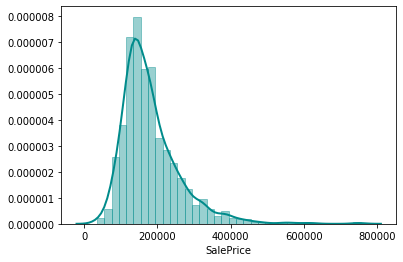

In [6]:
# Price distribution

sns.distplot(data["SalePrice"], hist=True, kde=True, 
             bins=int(180/5), color = 'darkcyan', 
             hist_kws={'edgecolor':'darkcyan'},
             kde_kws={'linewidth': 2})

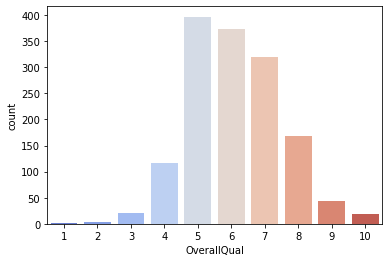

In [29]:
# Overall quality

ax = sns.countplot(x="OverallQual", data=data, palette ='coolwarm') 
plt.show()
ax = sns.countplot(x="OverallQual", data=data, palette ='coolwarm') 
plt.show()

Clean Nan
Given this analysis, we can notice that some features do not contain any valuable information. The ID Column is a good example. For this reason the ID column will be droped from the test set

In addition of that, we notice that there is many missing values. The job here would be to differanciate missing values (errors in the dataset) from the absence of the concernate feature in the house.

In the first case some columns have a high amount of missing values and might be related to other column that are more complete. The columns with a significant amount of missing values are:

- LotFrontage: 259 NaN
- Alley: 1369 NaN
- FireplaceQu: 690 NaN
- PoolQC: 1453 NaN
- Fence: 1179 NaN
- MiscFeature: 1406 NaN

For LotFrontage, since there is difficult to have no frontage we assumed that the NaN values can be replaced by the median. For PoolQC and MiscFeature that have above 95% of missing values and taken into account that the features PoolArea and MiscVal were complete, it was possible to remowe the features. In the case of the others the NaN values were set to 0 since it is probable that they the houses do not have this feature.

For the same reason, all the lower missing value number were also set to 0.

In [8]:
#Trop de Nan et était déjà quasiment expliqué par une autre colonne
data_cleaned=data.drop(columns=["Id","PoolQC","MiscFeature"] )  

data_cleaned['LotFrontage'] = data_cleaned['LotFrontage'].fillna(data_cleaned['LotFrontage'].median()) #remplacer les Nan par la médiane
data_cleaned['Alley'] = data_cleaned['Alley'].fillna(0) #y'a pas d'alley donc 0
data_cleaned['MasVnrType'] = data_cleaned['MasVnrType'].fillna('None') #Car la plupart des valeur c'est None
data_cleaned['MasVnrArea'] = data_cleaned['MasVnrArea'].fillna(0) #quand y'en a pas


#la y'a juste pas de basement
data_cleaned['BsmtQual'] = data_cleaned['BsmtQual'].fillna(0)
data_cleaned['BsmtCond'] = data_cleaned['BsmtCond'].fillna(0)
data_cleaned['BsmtExposure'] = data_cleaned['BsmtExposure'].fillna(0)
data_cleaned['BsmtFinType1'] = data_cleaned['BsmtFinType1'].fillna(0)
data_cleaned['BsmtFinType2'] = data_cleaned['BsmtFinType2'].fillna(0)
data_cleaned['BsmtCond'] = data_cleaned['BsmtCond'].fillna(0)


data_cleaned['Electrical'] = data_cleaned['Electrical'].fillna(0) #disont que cette maison n'a pas d'électricité

data_cleaned['FireplaceQu'] = data_cleaned['FireplaceQu'].fillna(0) #et pas de Fireplace

data_cleaned['GarageType'] = data_cleaned['GarageType'].fillna(0) # ni garage
data_cleaned['GarageYrBlt'] = data_cleaned['GarageYrBlt'].fillna(0) 
data_cleaned['GarageFinish'] = data_cleaned['GarageFinish'].fillna(0) 
data_cleaned['GarageQual'] = data_cleaned['GarageQual'].fillna(0) 
data_cleaned['GarageCond'] = data_cleaned['GarageCond'].fillna(0) 

data_cleaned['Fence'] = data_cleaned['Fence'].fillna(0) #pas de cloture

for name,dtype in zip(data_cleaned.columns, data_cleaned.dtypes):
    print(name,": ", dtype, "         Ex: ", data_cleaned[name].iloc[0], "    Number of NaN: ", data_cleaned[name].isnull().sum())

MSSubClass :  int64          Ex:  60     Number of NaN:  0
MSZoning :  object          Ex:  RL     Number of NaN:  0
LotFrontage :  float64          Ex:  65.0     Number of NaN:  0
LotArea :  int64          Ex:  8450     Number of NaN:  0
Street :  object          Ex:  Pave     Number of NaN:  0
Alley :  object          Ex:  0     Number of NaN:  0
LotShape :  object          Ex:  Reg     Number of NaN:  0
LandContour :  object          Ex:  Lvl     Number of NaN:  0
Utilities :  object          Ex:  AllPub     Number of NaN:  0
LotConfig :  object          Ex:  Inside     Number of NaN:  0
LandSlope :  object          Ex:  Gtl     Number of NaN:  0
Neighborhood :  object          Ex:  CollgCr     Number of NaN:  0
Condition1 :  object          Ex:  Norm     Number of NaN:  0
Condition2 :  object          Ex:  Norm     Number of NaN:  0
BldgType :  object          Ex:  1Fam     Number of NaN:  0
HouseStyle :  object          Ex:  2Story     Number of NaN:  0
OverallQual :  int64       

In [9]:
data_cleaned['MSZoning'] = data_cleaned['MSZoning'].replace("C (all)", 0).replace("RH", 1).replace("RM", 2).replace("RL", 3).replace("FV", 4)
data_cleaned['Street'] = data_cleaned['Street'].replace("Grvl", 1).replace("Pave", 2)
data_cleaned['Alley'] = data_cleaned['Alley'].replace("Grvl", 1).replace("Pave", 2)
data_cleaned['LotShape'] = data_cleaned['LotShape'].replace("Reg", 0).replace("IR1", 1).replace("IR2", 2).replace("IR3", 3) #retrouver le petit quartier pour adapter les codes
data_cleaned['LandContour'] = data_cleaned['LandContour'].replace("Low", 0).replace("HLS", 1).replace("Bnk", 2).replace("Lvl", 3) #A voir si les valeur ont du sens
data_cleaned['Utilities'] = data_cleaned['Utilities'].replace("NoSeWa", 0).replace("AllPub", 1)
data_cleaned['LotConfig'] = data_cleaned['LotConfig'].replace("Inside", 0).replace("Corner", 1).replace("FR2", 2).replace("FR3", 3).replace("CulDSac", 4)
data_cleaned['LandSlope'] = data_cleaned['LandSlope'].replace("Sev", 0).replace("Mod", 1).replace("Gtl", 2)
data_cleaned['Neighborhood'] = data_cleaned['Neighborhood'].replace("NAmes", 0).replace("CollgCr",1).replace("OldTown",2).replace("Edwards",3).replace("Somerst", 4).replace("Gilbert", 5).replace("NridgHt", 6).replace("Sawyer", 7).replace("NWAmes",8).replace("SawyerW", 9).replace("BrkSide",10).replace("Crawfor",11).replace("Mitchel",12).replace("NoRidge", 13).replace("Timber", 14).replace("IDOTRR", 15).replace("ClearCr",16).replace("SWISU", 17).replace("StoneBr", 18).replace("Blmngtn", 19).replace("MeadowV", 20).replace("BrDale", 21).replace("Veenker", 22).replace("NPkVill", 23).replace("Blueste", 24)

data_cleaned['Condition1'] = data_cleaned['Condition1'].replace("Norm", 0).replace("Feedr", 1).replace("Artery", 2).replace("RRAn", 3).replace("PosN", 4).replace("RRAe", 5).replace("PosA", 6).replace("RRNn", 7).replace("RRNe", 8)
data_cleaned['Condition2'] = data_cleaned['Condition2'].replace("Norm", 0).replace("Feedr", 1).replace("Artery", 2).replace("RRAn", 3).replace("PosN", 4).replace("RRAe", 5).replace("PosA", 6).replace("RRNn", 7).replace("RRNe", 8)

data_cleaned['BldgType'] = data_cleaned['BldgType'].replace("1Fam", 0).replace("TwnhsE", 1).replace("Duplex", 2).replace("Twnhs", 3).replace("2fmCon", 4)
data_cleaned['HouseStyle'] = data_cleaned['HouseStyle'].replace("1Story", 0).replace("2Story", 1).replace("1.5Fin", 2).replace("SLvl", 3).replace("SFoyer", 4).replace("1.5Unf", 5).replace("2.5Unf", 6).replace("2.5Fin", 7)

data_cleaned['RoofStyle'] = data_cleaned['RoofStyle'].replace("Gable", 0).replace("Hip", 1).replace("Flat", 2).replace("Gambrel", 3).replace("Mansard", 4).replace("Shed", 5)
data_cleaned['RoofMatl'] = data_cleaned['RoofMatl'].replace("CompShg", 0).replace("Tar&Grv", 1).replace("MetalSd", 2).replace("WdShngl", 3).replace("WdShake", 4).replace("ClyTile",6).replace("Membran", 6).replace("Roll", 7).replace("Metal", 8)

data_cleaned['Exterior1st'] = data_cleaned['Exterior1st'].replace("VinylSd", 0).replace("HdBoard", 1).replace("MetalSd", 2).replace("Wd Sdng", 3).replace("Plywood", 4).replace("CemntBd",5).replace("BrkFace", 6).replace("WdShing", 7).replace("Stucco", 8).replace("AsbShng", 9).replace("Stone",10).replace("BrkComm", 11).replace("CBlock", 12).replace("ImStucc", 13).replace("AsphShn", 14)
data_cleaned['Exterior2nd'] = data_cleaned['Exterior2nd'].replace("VinylSd", 0).replace("HdBoard", 1).replace("MetalSd", 2).replace("Wd Sdng", 3).replace("Plywood", 4).replace("CemntBd",5).replace("BrkFace", 6).replace("Wd Shng", 7).replace("Stucco", 8).replace("AsbShng", 9).replace("Stone",10).replace("BrkComm", 11).replace("CBlock", 12).replace("ImStucc", 13).replace("AsphShn", 14).replace("CmentBd", 15).replace("Wd Shbg", 16).replace("Brk Cmn", 17).replace("Other", 18)

data_cleaned['MasVnrType'] = data_cleaned["MasVnrType"].replace("None", 0).replace("BrkFace", 1).replace("Stone", 2).replace("BrkCmn", 3) #Classer

data_cleaned['ExterQual'] = data_cleaned['ExterQual'].replace("Po", 1).replace("Fa", 2).replace("TA", 3).replace("Gd", 4).replace("Ex", 5)
data_cleaned['ExterCond'] = data_cleaned['ExterQual'].replace("Po", 1).replace("Fa", 2).replace("TA", 3).replace("Gd", 4).replace("Ex", 5)

data_cleaned['Foundation'] = data_cleaned['Foundation'].replace("PConc", 0).replace("CBlock", 1).replace("BrkTil", 2).replace("Slab", 3).replace("Stone", 4).replace("Wood",5) #A adapter Ordre décroissant
data_cleaned['BsmtQual'] = data_cleaned['BsmtQual'].replace("Po", 1).replace("Fa", 2).replace("TA", 3).replace("Gd", 4).replace("Ex", 5) #Droper NA et classer dans l'ordre 
data_cleaned['BsmtCond'] = data_cleaned['BsmtCond'].replace("Po", 1).replace("Fa", 2).replace("TA", 3).replace("Gd", 4).replace("Ex", 5) # la même jusqu'à Total jusqu'au heat
data_cleaned['BsmtExposure'] = data_cleaned['BsmtExposure'].replace("No", 1).replace("Mn", 2).replace("Av", 3).replace("Gd", 4)
data_cleaned['BsmtFinType1'] = data_cleaned['BsmtFinType1'].replace("Unf", 1).replace("LwQ", 2).replace("Rec", 3).replace("BLQ", 4).replace("ALQ", 5).replace("GLQ", 6)
data_cleaned['BsmtFinType2'] = data_cleaned['BsmtFinType2'].replace("Unf", 1).replace("LwQ", 2).replace("Rec", 3).replace("BLQ", 4).replace("ALQ", 5).replace("GLQ", 6)

data_cleaned['Heating'] = data_cleaned['Heating'].replace("Wall", 1).replace("OthW", 2).replace("Grav", 3).replace("GasW", 4).replace("GasA", 5).replace("Floor", 6) #Chaufage au sol meilleur et 0 si pas de chauffage
data_cleaned['HeatingQC'] = data_cleaned['HeatingQC'].replace("Po", 1).replace("Fa", 2).replace("TA", 3).replace("Gd", 4).replace("Ex", 5)
data_cleaned['CentralAir'] = data_cleaned['CentralAir'].replace("Y", 1).replace("N", 0)
data_cleaned['Electrical'] = data_cleaned['Electrical'].replace("SBrkr", 1).replace("FuseA", 2).replace("FuseF", 3).replace("FuseP", 4).replace("Mix", 5) 
data_cleaned['KitchenQual'] = data_cleaned['KitchenQual'].replace("Po", 1).replace("Fa", 2).replace("TA", 3).replace("Gd", 4).replace("Ex", 5) 
data_cleaned['Functional'] = data_cleaned['Functional'].replace("Typ", 0).replace("Min2", 1).replace("Min1", 2).replace("Mod", 3).replace("Maj1", 4).replace("Maj2", 5).replace("Sev",6)
data_cleaned['FireplaceQu'] = data_cleaned['FireplaceQu'].replace("Po", 1).replace("Fa", 2).replace("TA", 3).replace("Gd", 4).replace("Ex", 5)
data_cleaned['GarageType'] = data_cleaned['GarageType'].replace("Attchd", 1).replace("Detchd", 2).replace("BuiltIn", 3).replace("Basment", 4).replace("CarPort", 5).replace("2Types", 6) 
data_cleaned['GarageFinish'] = data_cleaned['GarageFinish'].replace("Unf", 1).replace("RFn", 2).replace("Fin", 3)
data_cleaned['GarageQual'] = data_cleaned['GarageQual'].replace("Po", 1).replace("Fa", 2).replace("TA", 3).replace("Gd", 4).replace("Ex", 5)
data_cleaned['GarageCond'] = data_cleaned['GarageCond'].replace("Po", 1).replace("Fa", 2).replace("TA", 3).replace("Gd", 4).replace("Ex", 5)
data_cleaned['PavedDrive'] = data_cleaned['PavedDrive'].replace("N", 0).replace("P", 1).replace("Y", 2) 
#data_cleaned['PoolQC'] = data_cleaned['PoolQC'].replace("Po", 1).replace("Fa", 2).replace("TA", 3).replace("Gd", 4).replace("Ex", 5)
data_cleaned['Fence'] = data_cleaned['Fence'].replace("MnWw", 1).replace("GdWo", 2).replace("MnPrv", 3).replace("GdPrv", 4) 
#data_cleaned['MiscFeature'] = data_cleaned['MiscFeature'].replace("Othr", 1).replace("Shed", 2).replace("Gar2", 3).replace("TenC", 4).replace("Elev", 5)
data_cleaned['SaleType'] = data_cleaned['SaleType'].replace("WD", 0).replace("New", 1).replace("COD", 2).replace("ConLD", 3).replace("ConLw", 4).replace("ConLI", 5).replace("CWD", 6).replace("Oth", 7).replace("Con",8)
data_cleaned['SaleCondition'] = data_cleaned['SaleCondition'].replace("Normal", 0).replace("Partial",1).replace("Abnorml", 2).replace("Family", 3).replace("Alloca", 4).replace("AdjLand", 5)

In [10]:

for name,dtype in zip(data_cleaned.columns, data_cleaned.dtypes):
    print(name,": ", dtype, "         Ex: ", data_cleaned[name].iloc[0], "    Number of NaN: ", data_cleaned[name].isnull().sum())

for column in data_cleaned:
    print("---------------\n", data_cleaned[column].value_counts())

MSSubClass :  int64          Ex:  60     Number of NaN:  0
MSZoning :  int64          Ex:  3     Number of NaN:  0
LotFrontage :  float64          Ex:  65.0     Number of NaN:  0
LotArea :  int64          Ex:  8450     Number of NaN:  0
Street :  int64          Ex:  2     Number of NaN:  0
Alley :  int64          Ex:  0     Number of NaN:  0
LotShape :  int64          Ex:  0     Number of NaN:  0
LandContour :  int64          Ex:  3     Number of NaN:  0
Utilities :  int64          Ex:  1     Number of NaN:  0
LotConfig :  int64          Ex:  0     Number of NaN:  0
LandSlope :  int64          Ex:  2     Number of NaN:  0
Neighborhood :  int64          Ex:  1     Number of NaN:  0
Condition1 :  int64          Ex:  0     Number of NaN:  0
Condition2 :  int64          Ex:  0     Number of NaN:  0
BldgType :  int64          Ex:  0     Number of NaN:  0
HouseStyle :  int64          Ex:  1     Number of NaN:  0
OverallQual :  int64          Ex:  7     Number of NaN:  0
OverallCond :  int64 

Given this analysis, we can notice that some features doesn't contain any valuable information Those features are:

Id
...
In addition of that, we notice that there is many missing values. The job here would be to differanciate missing values (errors in the dataset) from the absence of the concernate feature in the house.

In the first case, we'll remove the row.

In the second case, we'll considere any object that can be absent as added value, and thus replacing NaNs by zero.

In [11]:
data_cleaned.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,2.852740,69.863699,10516.828082,1.995890,0.090411,0.408219,2.814384,0.999315,0.510274,...,3.409589,15.060959,2.758904,0.565753,43.489041,6.321918,2007.815753,0.233562,0.311644,180921.195890
std,42.300571,0.527086,22.027677,9981.264932,0.063996,0.372151,0.582296,0.606509,0.026171,1.050750,...,29.317331,55.757415,40.177307,1.204483,496.123024,2.703626,1.328095,0.793805,0.767397,79442.502883
min,20.000000,0.000000,21.000000,1300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,34900.000000
25%,20.000000,3.000000,60.000000,7553.500000,2.000000,0.000000,0.000000,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,0.000000,0.000000,129975.000000
50%,50.000000,3.000000,69.000000,9478.500000,2.000000,0.000000,0.000000,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,0.000000,0.000000,163000.000000
75%,70.000000,3.000000,79.000000,11601.500000,2.000000,0.000000,1.000000,3.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,0.000000,0.000000,214000.000000
max,190.000000,4.000000,313.000000,215245.000000,2.000000,2.000000,3.000000,3.000000,1.000000,4.000000,...,508.000000,480.000000,738.000000,4.000000,15500.000000,12.000000,2010.000000,8.000000,5.000000,755000.000000


In [12]:
print(data.shape)
print(data_cleaned.shape)

(1460, 81)
(1460, 78)


(array([0.5]), <a list of 1 Text yticklabel objects>)

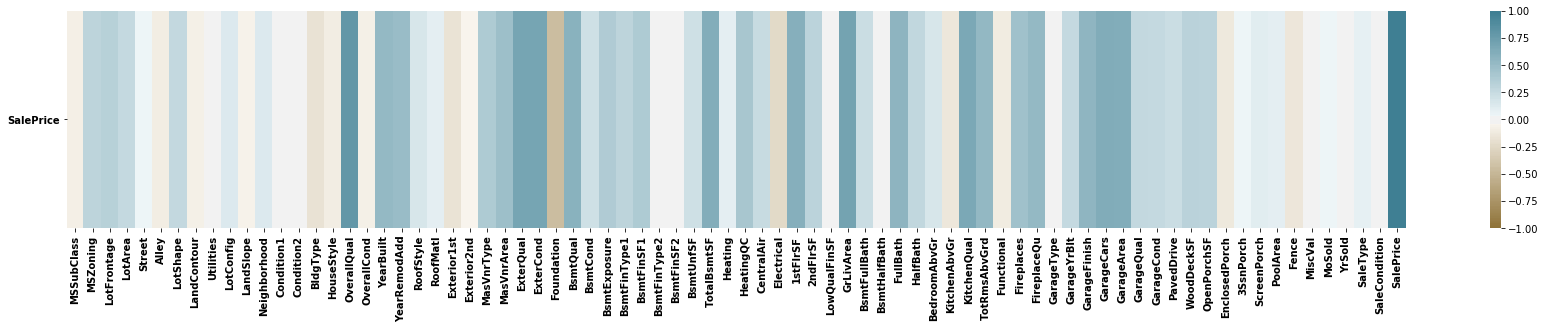

In [13]:
f,ax=plt.subplots(figsize=(30,4))
corr = data_cleaned.corr()
ax = sns.heatmap(corr.sort_values(by=['SalePrice'], ascending=False).head(1), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(420, 220, n=200),
    square=False
)
plt.xticks(weight='bold')
plt.yticks(weight='bold', rotation=0)


In [14]:
corr = data_cleaned.corr()
corrVal=corr["SalePrice"].sort_values(ascending=False).to_frame()
corrVal.head(50)

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
ExterCond,0.682639
ExterQual,0.682639
KitchenQual,0.659600
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852


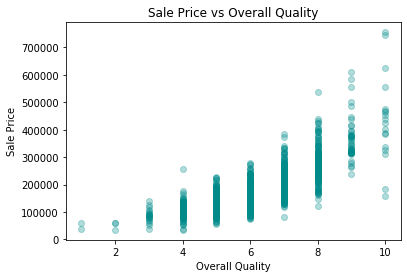

In [15]:
plt.scatter(data_cleaned["OverallQual"], data_cleaned["SalePrice"], c="darkcyan", alpha=0.3)
plt.title('Sale Price vs Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()

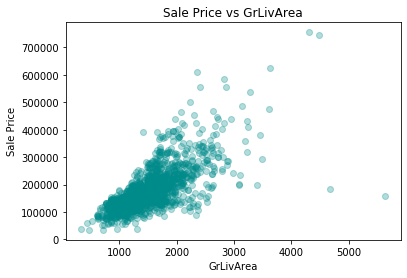

In [16]:
plt.scatter(data_cleaned["GrLivArea"], data_cleaned["SalePrice"], c="darkcyan", alpha=0.3)
plt.title('Sale Price vs GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('Sale Price')
plt.show()

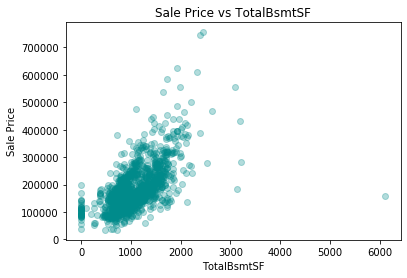

In [17]:
plt.scatter(data_cleaned["TotalBsmtSF"], data_cleaned["SalePrice"], c="darkcyan", alpha=0.3)
plt.title('Sale Price vs TotalBsmtSF')
plt.xlabel('TotalBsmtSF')
plt.ylabel('Sale Price')
plt.show()

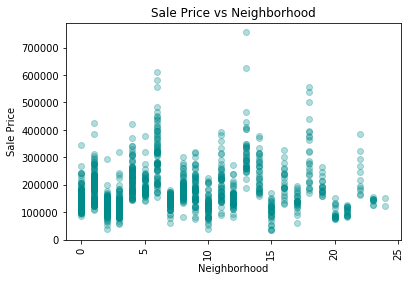

In [41]:
plt.scatter(data_cleaned["Neighborhood"], data_cleaned["SalePrice"], c="darkcyan", alpha=0.3)
plt.title('Sale Price vs Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Sale Price')
plt.xticks(rotation=90)
plt.show()



In [68]:
Neighborhood = data_cleaned[['Neighborhood',"SalePrice"]] 
Neighborhood["Neighborhood"] = Neighborhood['Neighborhood'].replace(0,"NAmes").replace(1,"CollgCr").replace(2,"OldTown").replace(3,"Edwards").replace(4,"Somerst").replace(5,"Gilbert").replace(6,"NridgHt").replace(7,"Sawyer").replace(8,"NWAmes").replace(9,"SawyerW").replace(10,"BrkSide").replace(11,"Crawfor").replace(12,"Mitchel").replace(13,"NoRidge").replace(14,"Timber").replace(15,"IDOTRR").replace(16,"ClearCr").replace(17,"SWISU").replace(18,"StoneBr").replace(19,"Blmngtn").replace(20,"MeadowV").replace(21,"BrDale").replace(22,"Veenker").replace(23,"NPkVill").replace(24,"Blueste") 

Table=Neighborhood.groupby('Neighborhood', as_index=False)["SalePrice"].median().sort_values("SalePrice",ascending=False)
Table


C:\Users\Yannick\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Neighborhood,SalePrice
16,NridgHt,314906.5
15,NoRidge,295750.0
22,StoneBr,278000.0
23,Timber,233500.0
21,Somerst,225500.0
24,Veenker,218000.0
6,Crawfor,200624.0
4,ClearCr,200000.0
5,CollgCr,197200.0
0,Blmngtn,191000.0


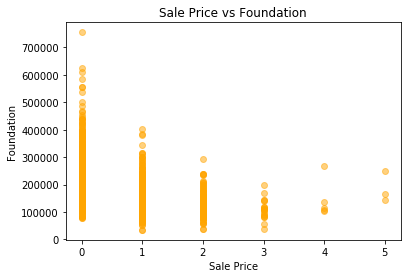

In [35]:
plt.scatter(data_cleaned["Foundation"], data_cleaned["SalePrice"], c="orange", alpha=0.5)
plt.title('Sale Price vs Foundation')
plt.xlabel('Sale Price')
plt.ylabel('Foundation')
plt.show()

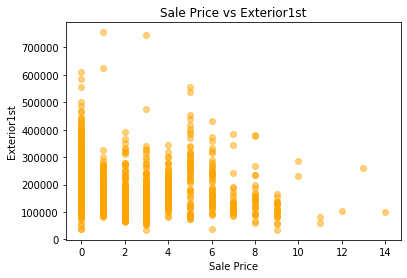

In [19]:
plt.scatter(data_cleaned["Exterior1st"], data_cleaned["SalePrice"], c="orange", alpha=0.5)
plt.title('Sale Price vs Exterior1st')
plt.xlabel('Sale Price')
plt.ylabel('Exterior1st')
plt.show()

In [20]:
X = StandardScaler().fit_transform(data_cleaned.values)

db = DBSCAN(eps=12.0, min_samples=10).fit(X)
labels = db.labels_

print(pd.Series(labels).value_counts())
data_cleaned["Outliers"]=labels
data_cleaned = data_cleaned[data_cleaned.Outliers != -1]
data_cleaned=data_cleaned.drop(columns=["Outliers"] )

 0    1418
-1      42
dtype: int64


In [21]:
print(data_cleaned.columns)
x = data_cleaned.iloc[:, 0:len(data_cleaned.columns)-2].to_numpy()
y = data_cleaned['SalePrice'].to_numpy()


# Train test split
train_test_ratio = 0.2

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=train_test_ratio, random_state=42)

print("Train: ", X_train.shape, y_train.shape)
print("Test: ", X_test.shape, y_test.shape)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

To perform a PCA, the data should first be normalised. To do so, the data are scaled using their minimum and maximum values.
The dataset must be also divided in a train and test set.

In [22]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Then the PCA is done. The explained variance ratio provides the amount of variance explained by each dimensions of the problem. These dimensions do not have clear meanings in our problem. 80% of the sale price could be explained by only 22 dimensions instead of 77 given at the begining.

In [23]:
pca = PCA()
pca.fit(X_train)
variance = np.cumsum(pca.explained_variance_ratio_)

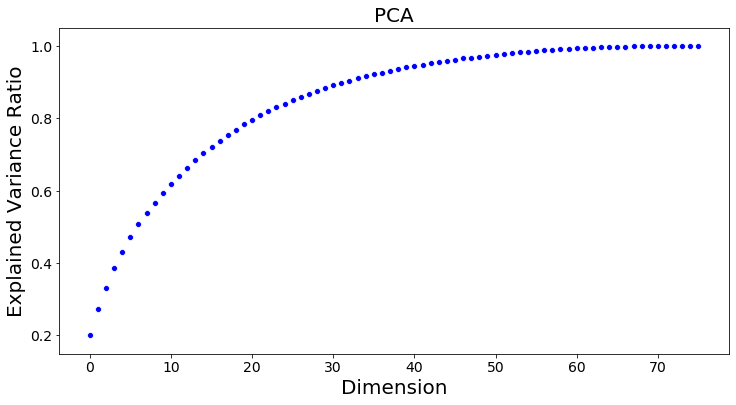

[0.19878857 0.27079414 0.33036956 0.38494817 0.42943672 0.47172103
 0.50733136 0.53774349 0.56597188 0.59247529 0.61705553 0.64022542
 0.66244143 0.68371023 0.70345693 0.72122151 0.73794223 0.75392394
 0.76898769 0.78306864 0.79601894 0.80826698 0.81965396 0.83052863]


In [24]:
plt.figure(figsize=(12, 6))
ax = sns.scatterplot(data=variance,color='b')
ax.set_xlabel('Dimension', fontsize = 20)
ax.set_ylabel('Explained Variance Ratio', fontsize = 20)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.title("PCA", fontsize = 20)
plt.show()
print(variance[0:24])

In [25]:
pca = PCA(n_components=70)
pca.fit(X_train)
#train_input = pca.transform(X_train)
#test_input = pca.transform(X_test)
train_input = X_train
test_input = X_test
print(y_train)

[143000 143750 151000 ... 125500 145000 230000]


In [26]:
# Tensorflow deep feed forward

activation_functions = ['elu', 'exponential', 'hard_sigmoid', 'linear', 'relu', 'selu']
i = 1 # 1 4 5
input_layer = Input(shape=(train_input.shape[1],))
dense_layer_1 = Dense(200, activation=activation_functions[i])(input_layer)
dense_layer_2 = Dense(130, activation=activation_functions[i])(dense_layer_1)
dense_layer_3 = Dense(60, activation=activation_functions[i])(dense_layer_2)
output = Dense(1)(dense_layer_3)

model = Model(inputs=input_layer, outputs=output)
model.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 76)]              0         
_________________________________________________________________
dense (Dense)                (None, 200)               15400     
_________________________________________________________________
dense_1 (Dense)              (None, 130)               26130     
_________________________________________________________________
dense_2 (Dense)              (None, 60)                7860      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 61        
Total params: 49,451
Trainable params: 49,451
Non-trainable params: 0
_________________________________________________________________
None


In [27]:
history = model.fit(train_input, y_train, batch_size=10, epochs=100, verbose=1, validation_split=0.2)

Train on 907 samples, validate on 227 samples
Epoch 1/100
907/907 [==============================] - 1s 1ms/sample - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 2/100
907/907 [==============================] - 0s 243us/sample - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 3/100
907/907 [==============================] - 0s 235us/sample - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 4/100
907/907 [==============================] - 0s 233us/sample - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 5/100
907/907 [==============================] - 0s 255us/sample - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 6/100
907/907 [==============================] - 0s 247us/sample - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 7/100
907/907 [=====

907/907 [==============================] - 0s 240us/sample - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 54/100
907/907 [==============================] - 0s 261us/sample - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 55/100
907/907 [==============================] - 0s 236us/sample - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 56/100
907/907 [==============================] - 0s 260us/sample - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 57/100
907/907 [==============================] - 0s 251us/sample - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 58/100
907/907 [==============================] - 0s 227us/sample - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 59/100
907/907 [==============================] - 0s 233us/sample - los

In [28]:
pred_train = model.predict(train_input)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred = model.predict(test_input)
print(np.sqrt(mean_squared_error(y_test,pred)))

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
# Random TF prediction function
def random_prediction(x: np.ndarray, model, n=5):
    size = x.shape[0]-1
    for _ in range(n):
        number = random.randint(0, size)
        y = y_test[number]
        y_hat = int(model.predict(test_input[number].reshape(1, -1))[0])
        print("Real price: ", y, " Predicted one: ", y_hat, " Error: ", int((y-y_hat)/y_hat*100), "%")

In [ ]:
random_prediction(test_input, model, 20)

In [ ]:
# Train folding (cross-val)
n = 6

cv = ShuffleSplit(n_splits=n, test_size=0.3, random_state=0)

print(cv)

In [ ]:
# Random sklearn prediction function
def random_prediction(x: np.ndarray, reg, n=5):
    size = x.shape[0]-1
    for _ in range(n):
        number = random.randint(0, size)
        y = y_test[number]
        y_hat = int(reg.predict(test_input[number].reshape(1, -1))[0])
        print(y_hat)
        print("Real price: ", y, " Predicted one: ", y_hat, " Error: ", int((y-y_hat)/y_hat*100), "%")

In [ ]:
# SVM

parameters = [1]
mse_report = np.zeros((len(parameters), n))

for i, par in enumerate(parameters):
        reg = svm.SVR()
        mse_report[i, :] = cross_val_score(reg, train_input, y_train, cv=cv)
        
plt.boxplot(mse_report.T)
mu_perf = np.mean(mse_report, axis=1)
std_perf = np.std(mse_report, axis=1)
max_perf = np.max(mse_report, axis=1)
min_perf = np.min(mse_report, axis=1)

In [ ]:

king_parameter = 1

reg.fit(train_input, y_train)
y_pred = reg.predict(test_input)
print("MSE: ", sqrt(mean_squared_error(y_test, y_pred)))
print("r2 score: ", r2_score(y_test, y_pred))

In [ ]:
random_prediction(x=test_input, reg=reg)

In [ ]:
# KNN

parameters = [i for i in range(1, 33)]
mse_report = np.zeros((len(parameters), n))
test_report = np.zeros((len(parameters), 2))

for i, par in enumerate(parameters):
        reg = KNeighborsRegressor(n_neighbors=par, n_jobs=-1)
        mse_report[i, :] = cross_val_score(reg, train_input, y_train, cv=cv)
        reg.fit(train_input, y_train)
        y_pred = reg.predict(train_input)
        test_report[i, 0] = mean_squared_error(y_train, y_pred)
        y_pred = reg.predict(test_input)
        test_report[i, 1] = mean_squared_error(y_test, y_pred)
        
        
        
plt.boxplot(mse_report.T)
mu_perf = np.mean(mse_report, axis=1)
std_perf = np.std(mse_report, axis=1)
max_perf = np.max(mse_report, axis=1)
min_perf = np.min(mse_report, axis=1)

In [ ]:
plt.plot(test_report[:, 0], "--")
plt.plot(test_report[:, 1])

In [ ]:
king_parameter = 3
print(train_input.shape)
reg.fit(train_input, y_train)
y_pred = reg.predict(test_input)
print("MSE: ", sqrt(mean_squared_error(y_test, y_pred)))
print("r2 score: ", r2_score(y_test, y_pred))

In [ ]:
random_prediction(x=test_input, reg=reg)

In [ ]:
# FWW_NN

parameters = [(100, 75, 50, 25), (100, 66, 33), (100, 50), (100,)]
mse_report = np.zeros((len(parameters), n))

for i, par in enumerate(parameters):
        reg = MLPRegressor(hidden_layer_sizes=par, activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=1000, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
        print(reg.get_params())
        mse_report[i, :] = cross_val_score(reg, train_input, y_train, cv=cv)
        
plt.boxplot(mse_report.T)
mu_perf = np.mean(mse_report, axis=1)
std_perf = np.std(mse_report, axis=1)
max_perf = np.max(mse_report, axis=1)
min_perf = np.min(mse_report, axis=1)

In [ ]:
king_parameter = (100, 66, 33)

reg = MLPRegressor(hidden_layer_sizes=king_parameter, activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=1000, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
reg.fit(train_input, y_train)
y_pred = reg.predict(test_input)
print("MSE: ", sqrt(mean_squared_error(y_test, y_pred)))
print("r2 score: ", r2_score(y_test, y_pred))

In [ ]:
random_prediction(x=test_input, reg=reg, n=30)